In [20]:
%matplotlib widget
from functions import binary_search
from tqdm.notebook import tqdm, trange
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import math

In [6]:
n_vals = [1000*i for i in range(1,101)]

In [23]:
comps = {}
for n in tqdm(n_vals):
    arr = range(n)
    comps[n] = {}
    for k in range(100):
        i = n*k/100
        data = 0
        for _ in range(100):
            _, c = binary_search(arr, i)
            data += c
        comps[n][k] = data/100

  0%|          | 0/100 [00:00<?, ?it/s]

In [30]:
xs = []
ys = []
zs = []

for x in n_vals:
    for y in range(100):
        zs.append(comps[x][y])
        xs.append(x)
        ys.append(y)

C:\Users\oem\AppData\Local\Temp\ipykernel_48924\3155675342.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


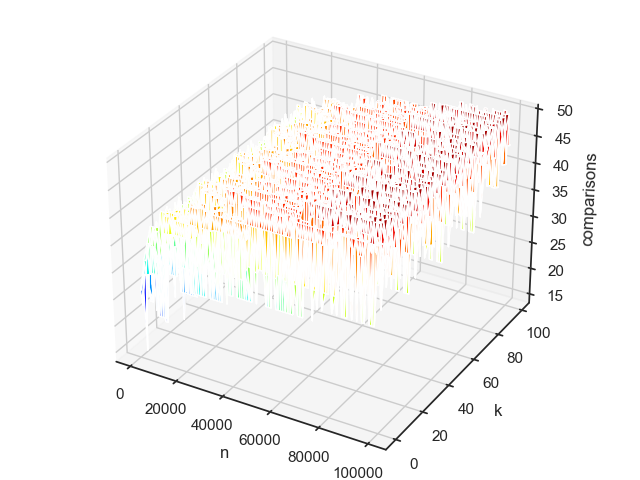

In [31]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_c = ax.plot_trisurf(xs, ys, zs, cmap=plt.cm.jet)

# setting title and labels
ax.set_title("Select")
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_zlabel('comparisons')

# displaying the plot
plt.show()

C:\Users\oem\AppData\Local\Temp\ipykernel_48924\3447936308.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


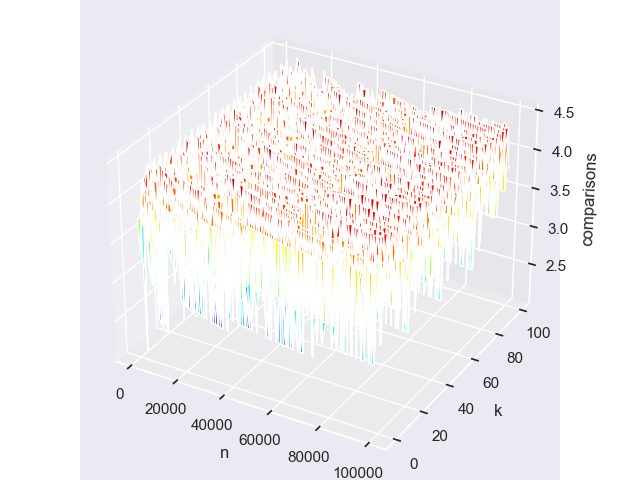

In [26]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_c = ax.plot_trisurf(xs, ys, [zs[i]/math.log(xs[i]) for i in range(len(xs))], cmap=plt.cm.jet)

# setting title and labels
ax.set_title("Select")
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_zlabel('comparisons')

# displaying the plot
plt.show()

In [32]:
out_c = {}
for x in n_vals:
    arr = range(x)
    out_c[x] = 0
    for _ in range(100):
        _, comps_2 = binary_search(arr, x)
        out_c[x] += comps_2
    out_c[x] /= 100

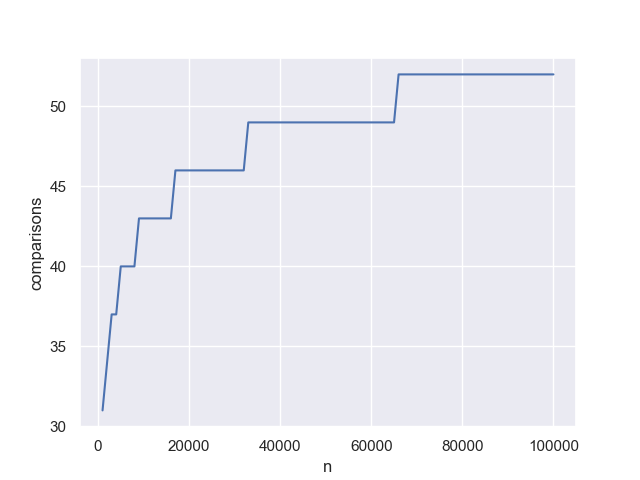

In [35]:
sns.set()
plt.clf()
ys = []
for x in n_vals:
    ys.append(out_c[x])
plt.plot(n_vals, ys)
plt.xlabel('n')
plt.ylabel('comparisons')
plt.show()

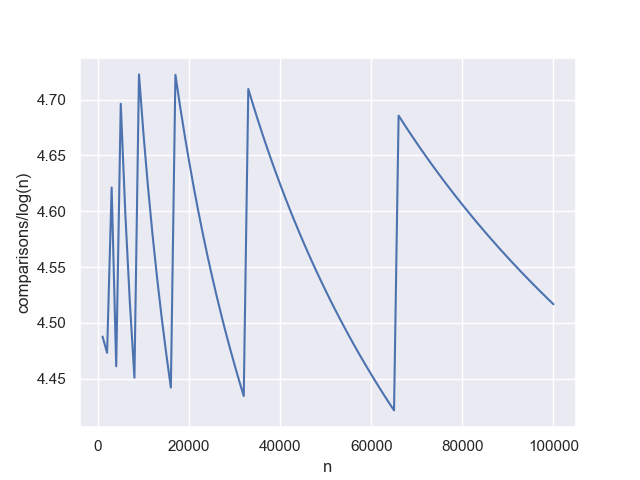

In [36]:
plt.clf()
ys = []
for x in n_vals:
    ys.append(out_c[x]/math.log(x))
plt.plot(n_vals, ys)
plt.xlabel('n')
plt.ylabel('comparisons/log(n)')
plt.show()